In [129]:
import pandas as pd
import datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', 200)
data = pd.read_csv('melb_data.csv')

In [113]:
#1.check null values
data.isnull().sum().sort_values(ascending = False)

BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Car                62
Propertycount       0
Date                0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Bedroom2            0
Distance            0
Postcode            0
Regionname          0
Bathroom            0
Landsize            0
Lattitude           0
Longtitude          0
Suburb              0
dtype: int64

In [114]:
#2.fill the null values.
data['Car'] = data['Car'].fillna(0)
data['BuildingArea'] = data['BuildingArea'].fillna(data['BuildingArea'].median)
data['YearBuilt'] = data['YearBuilt'].fillna(data['YearBuilt'].median)
data['CouncilArea'] = data['CouncilArea'].fillna(method = 'ffill')

In [115]:
data

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,<bound method Series.median of 0 NaN\...,<bound method Series.median of 0 NaN...,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79,1900,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150,1900,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,<bound method Series.median of 0 NaN\...,<bound method Series.median of 0 NaN...,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142,2014,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,26/08/2017,16.7,3150.0,4.0,2.0,2.0,652.0,<bound method Series.median of 0 NaN\...,1981,Maribyrnong,-37.90562,145.16761,South-Eastern Metropolitan,7392.0
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,26/08/2017,6.8,3016.0,3.0,2.0,2.0,333.0,133,1995,Maribyrnong,-37.85927,144.87904,Western Metropolitan,6380.0
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,26/08/2017,6.8,3016.0,3.0,2.0,4.0,436.0,<bound method Series.median of 0 NaN\...,1997,Maribyrnong,-37.85274,144.88738,Western Metropolitan,6380.0
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,26/08/2017,6.8,3016.0,4.0,1.0,5.0,866.0,157,1920,Maribyrnong,-37.85908,144.89299,Western Metropolitan,6380.0


In [116]:
#3. process the time information
data['Date'] = pd.to_datetime(data['Date'],format='%d/%m/%Y')
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Year,Month
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-12-03,2.5,3067.0,2.0,1.0,1.0,202.0,<bound method Series.median of 0 NaN\...,<bound method Series.median of 0 NaN...,Yarra,-37.79960,144.99840,Northern Metropolitan,4019.0,2016,12
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-02-04,2.5,3067.0,2.0,1.0,0.0,156.0,79,1900,Yarra,-37.80790,144.99340,Northern Metropolitan,4019.0,2016,2
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-03-04,2.5,3067.0,3.0,2.0,0.0,134.0,150,1900,Yarra,-37.80930,144.99440,Northern Metropolitan,4019.0,2017,3
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,2017-03-04,2.5,3067.0,3.0,2.0,1.0,94.0,<bound method Series.median of 0 NaN\...,<bound method Series.median of 0 NaN...,Yarra,-37.79690,144.99690,Northern Metropolitan,4019.0,2017,3
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,2016-06-04,2.5,3067.0,3.0,1.0,2.0,120.0,142,2014,Yarra,-37.80720,144.99410,Northern Metropolitan,4019.0,2016,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13575,Wheelers Hill,12 Strada Cr,4,h,1245000.0,S,Barry,2017-08-26,16.7,3150.0,4.0,2.0,2.0,652.0,<bound method Series.median of 0 NaN\...,1981,Maribyrnong,-37.90562,145.16761,South-Eastern Metropolitan,7392.0,2017,8
13576,Williamstown,77 Merrett Dr,3,h,1031000.0,SP,Williams,2017-08-26,6.8,3016.0,3.0,2.0,2.0,333.0,133,1995,Maribyrnong,-37.85927,144.87904,Western Metropolitan,6380.0,2017,8
13577,Williamstown,83 Power St,3,h,1170000.0,S,Raine,2017-08-26,6.8,3016.0,3.0,2.0,4.0,436.0,<bound method Series.median of 0 NaN\...,1997,Maribyrnong,-37.85274,144.88738,Western Metropolitan,6380.0,2017,8
13578,Williamstown,96 Verdon St,4,h,2500000.0,PI,Sweeney,2017-08-26,6.8,3016.0,4.0,1.0,5.0,866.0,157,1920,Maribyrnong,-37.85908,144.89299,Western Metropolitan,6380.0,2017,8


In [117]:
#4. check years
data['Year'].unique()

array([2016, 2017], dtype=int64)

In [118]:
#4.1 check the months for evey year
df1=data[data['Year']==2016]
df1['Month'].unique()
# array_df1 = df1['Month'].unique().sort()
# array_df1=np.array(df1['Month'].unique())
# array_df1 = array_df1.argsort()
# array_df1
# Mar is missed.

array([12,  2,  6,  5, 10, 11,  8,  7,  9,  4,  1], dtype=int64)

In [119]:
#4.2 check the months for evey year
df2=data[data['Year']==2017]
df2['Month'].unique()
#Jan, may, Oct, Nov, Dec are missed.

array([3, 2, 5, 4, 7, 6, 8, 9], dtype=int64)

In [120]:
data['Season'] = data['Year']%12 // 3 + 1 

In [121]:
SEASON_DICT = {1:'summer', 2:'Autumn', 3:'WInter', 4: 'Spring'}
data['Season'] = data['Season'].apply(lambda x: SEASON_DICT[x])
data['Season']

0        summer
1        summer
2        summer
3        summer
4        summer
          ...  
13575    summer
13576    summer
13577    summer
13578    summer
13579    summer
Name: Season, Length: 13580, dtype: object

In [122]:
df_year_month_sale = data.groupby(['Year','Month']).size().reset_index(name='count')
df_year_month_sale_2016 = df_year_month_sale[df_year_month_sale['Year']==2016]

df_year_month_sale_2016 

,Year,Month,count
0,2016,1,2
1,2016,2,26
2,2016,4,318
3,2016,5,899
4,2016,6,732
5,2016,7,446
6,2016,8,716
7,2016,9,925
8,2016,10,551
9,2016,11,1114


In [123]:
df_year_month_sale_2017 = df_year_month_sale[df_year_month_sale['Year']==2017]
df_year_month_sale_2017 

,Year,Month,count
11,2017,2,417
12,2017,3,678
13,2017,4,631
14,2017,5,1130
15,2017,6,1098
16,2017,7,1536
17,2017,8,834
18,2017,9,920


In [124]:
data['Regionname'].unique()

array(['Northern Metropolitan', 'Western Metropolitan',
       'Southern Metropolitan', 'Eastern Metropolitan',
       'South-Eastern Metropolitan', 'Eastern Victoria',
       'Northern Victoria', 'Western Victoria'], dtype=object)

In [125]:
df_region_sale = data.groupby(['Year','Month','Regionname']).size().reset_index(name='count')
df_region_sale_2016 = df_region_sale[df_region_sale['Year']==2016]
df_region_sale_2016

,Year,Month,Regionname,count
0,2016,1,Southern Metropolitan,2
1,2016,2,Eastern Metropolitan,1
2,2016,2,Northern Metropolitan,5
3,2016,2,South-Eastern Metropolitan,1
4,2016,2,Southern Metropolitan,9
5,2016,2,Western Metropolitan,10
6,2016,4,Eastern Metropolitan,32
7,2016,4,Northern Metropolitan,101
8,2016,4,Southern Metropolitan,98
9,2016,4,Western Metropolitan,87


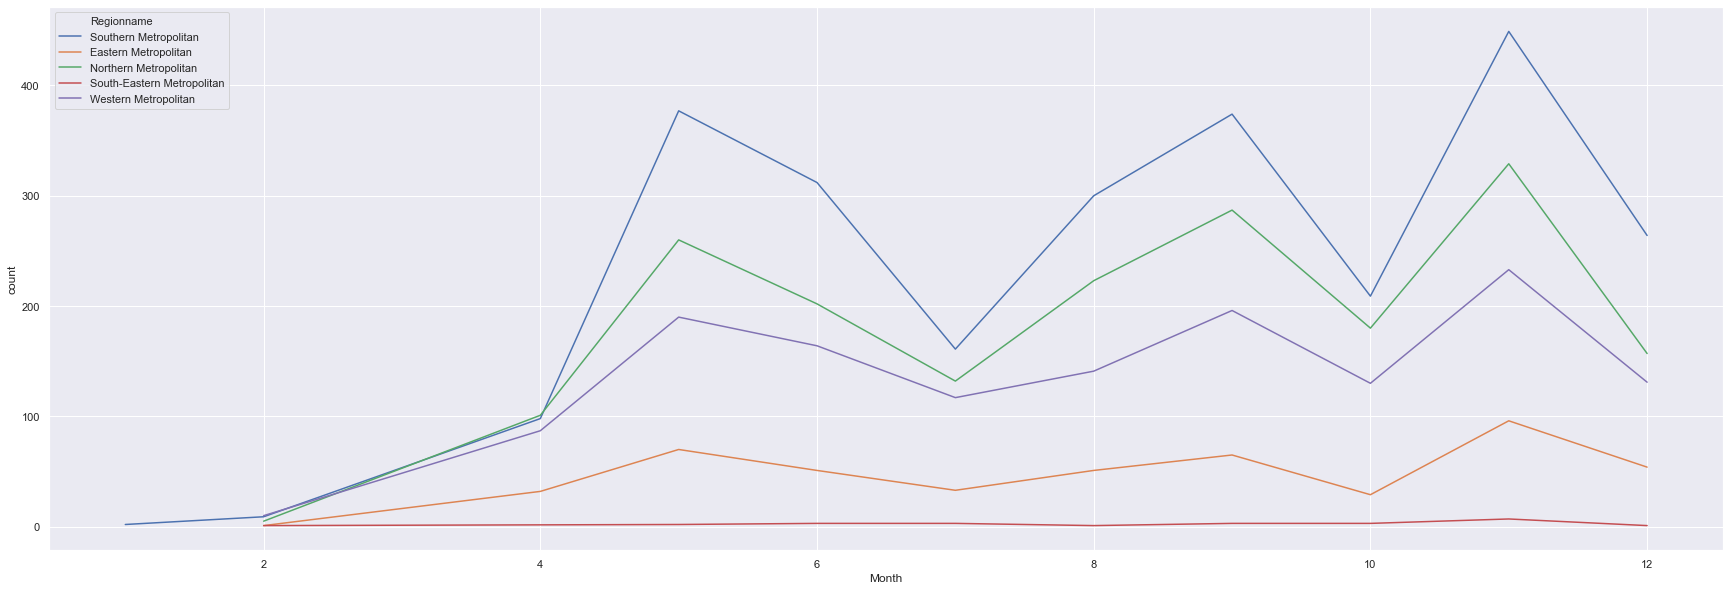

In [139]:
plt.figure(figsize=(30, 10))
sns.set(style="darkgrid")
sns.lineplot(x='Month',y = 'count',hue = 'Regionname',data=df_region_sale_2016)
# axs.set_xlabel('Regionname')
# axs.set_ylabel('count')